## Import modules

In [1]:
import pdb
import glob

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy.random import normal as norm

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

import nhanes as nhanes

%matplotlib notebook

In [2]:
np.random.seed(100)

## Settings

In [3]:
DATA_PATH = '/Users/teianoel/Desktop/CS_205/Opportunistic-master/CDC/NHANES/'
DATASET = 'arthritis'

### Note: 
The code below loads each dataset: dataset_features, dataset_targets

Here, all datasets are defined explicitly (see nhanes.py).

In [4]:
ds = nhanes.Dataset(DATA_PATH)
ds.load_arthritis()
n_fe = ds.features.shape[1]
n_classes = 2

dataset_features = ds.features
dataset_targets = ds.targets

Processing: ALQ_E.XPT

/anaconda3/lib/python3.6/site-packages/pandas/io/sas/sas_xport.py:204: RuntimeWarning: invalid value encountered in left_shift
  ieee2 = (xport2 >> shift) | ((xport1 & 0x00000007) << (29 + (3 - shift)))


Processing: FASTQX_F.XPT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Processing: WHQMEC_H.XPT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [5]:
ds.feat_names

Index(['RIAGENDR#1.0', 'RIAGENDR#2.0', 'RIDAGEYR', 'RIDRETH3#1.0',
       'RIDRETH3#2.0', 'RIDRETH3#3.0', 'RIDRETH3#4.0', 'RIDRETH3#6.0',
       'RIDRETH3#7.0', 'DMDHHSIZ', 'INDHHIN2', 'INDFMPIR', 'BPXCHR', 'BPXPLS',
       'BPXPULS#1.0', 'BPXPULS#2.0', 'BPXML1', 'BPXSY1', 'BPXDI1', 'BMXWT',
       'BMXBMI', 'LBXBPB', 'LBDBCDSI', 'LBDTHGSI', 'LBXBSE', 'LBDBCRSI',
       'LBDBMNSI', 'URXUCL#1.0', 'URXUCL#2.0', 'LBDHDD', 'LBXTC', 'ORXHPV#1.0',
       'ORXHPV#2.0', 'LBXHBC#1.0', 'LBXHBC#2.0', 'LBXHBS#1.0', 'LBXHBS#2.0',
       'LBXHE2#1.0', 'LBXHE2#2.0', 'LBXHE1#1.0', 'LBXHE1#2.0', 'LBXHIVC#1.0',
       'LBXHIVC#2.0', 'URXUIO', 'LBXACR', 'URDFLOW1', 'HSD010#1.0',
       'HSD010#2.0', 'HSD010#3.0', 'HSD010#4.0', 'HSD010#5.0', 'HSD010#9.0',
       'SMQ020#1.0', 'SMQ020#2.0', 'SMD650', 'ALQ130', 'HIQ011#1.0',
       'HIQ011#2.0', 'PAQ650#1.0', 'PAQ650#2.0', 'DED031#1.0', 'DED031#2.0',
       'DED031#3.0', 'DED031#4.0', 'DED031#5.0', 'DED031#6.0', 'DBD910',
       'DEQ038Q', 'DED120', 'RHQ010

In [5]:
# plt.hist(dataset_features[1],bins=range(0,math.ceil(np.log2(81)))

SyntaxError: unexpected EOF while parsing (<ipython-input-5-8dd867443ba9>, line 1)

## Distribution analysis of real-valued features

[   0.            1.           21.            0.            0.            0.
    0.            0.            0.            4.           74.48634075
  119.75065035   66.24051771   61.45330032   25.38561423    3.58776508
  187.52320258    7.60074383    0.            0.            0.            0.
    0.            0.            0.          384.52227099   71.27768897
    0.            1.            0.            0.            2.75544133
    1.            0.            0.            0.            1.            0.
    0.            0.            0.81108691    2.1521188   102.25031354
   12.33986468    2.            1.87721746    1.78208092    1.51327434]


<IPython.core.display.Javascript object>


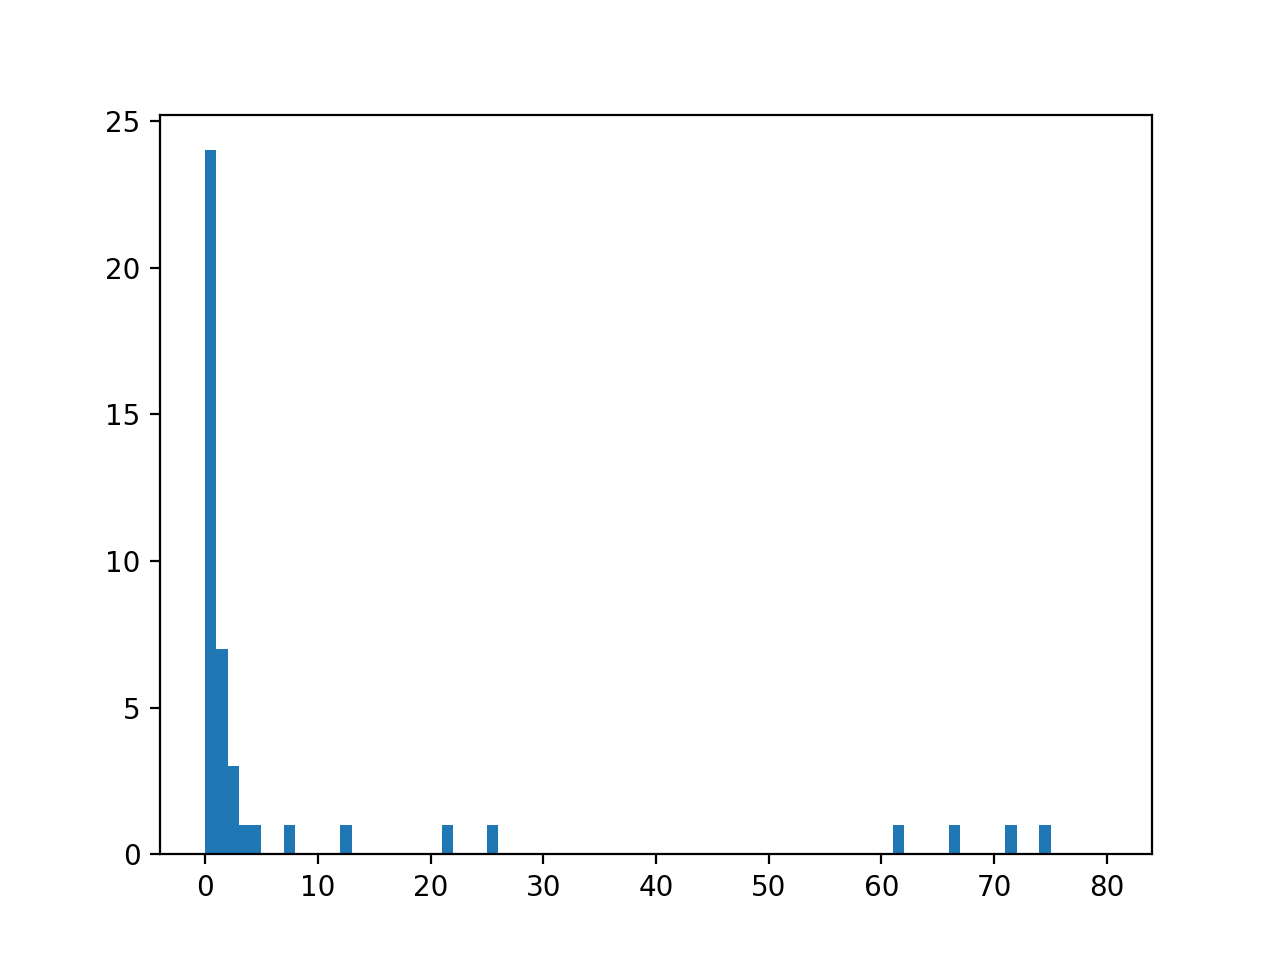

In [10]:
# Distribution of age w/ no transformation/standardization
# print(dataset_features[1])
# plt.hist(dataset_features[1],bins=range(0,81))
# plt.show()

[0, 0.0, 4.3923174227787607, 0, 0, 0, 0, 0, 0, 2.0, 6.2189039843943617, 6.9038896808642276, 6.0496420433538836, 5.9414185868768454, 4.665939262606412, 1.8430854300912436, 7.5509253036759043, 2.926140611857436, 0, 0, 0, 0, 0, 0, 0, 8.5869233492479626, 6.1553786560796437, 0, 0.0, 0, 0, 1.4622834090432293, 0.0, 0, 0, 0, 0.0, 0, 0, 0, -0.30207159208369472, 1.1057577172473452, 6.6759614567873857, 3.6252546687322202, 1.0, 0.90859578453523104, 0.83356285158308829, 0.59767355247071008]


<IPython.core.display.Javascript object>


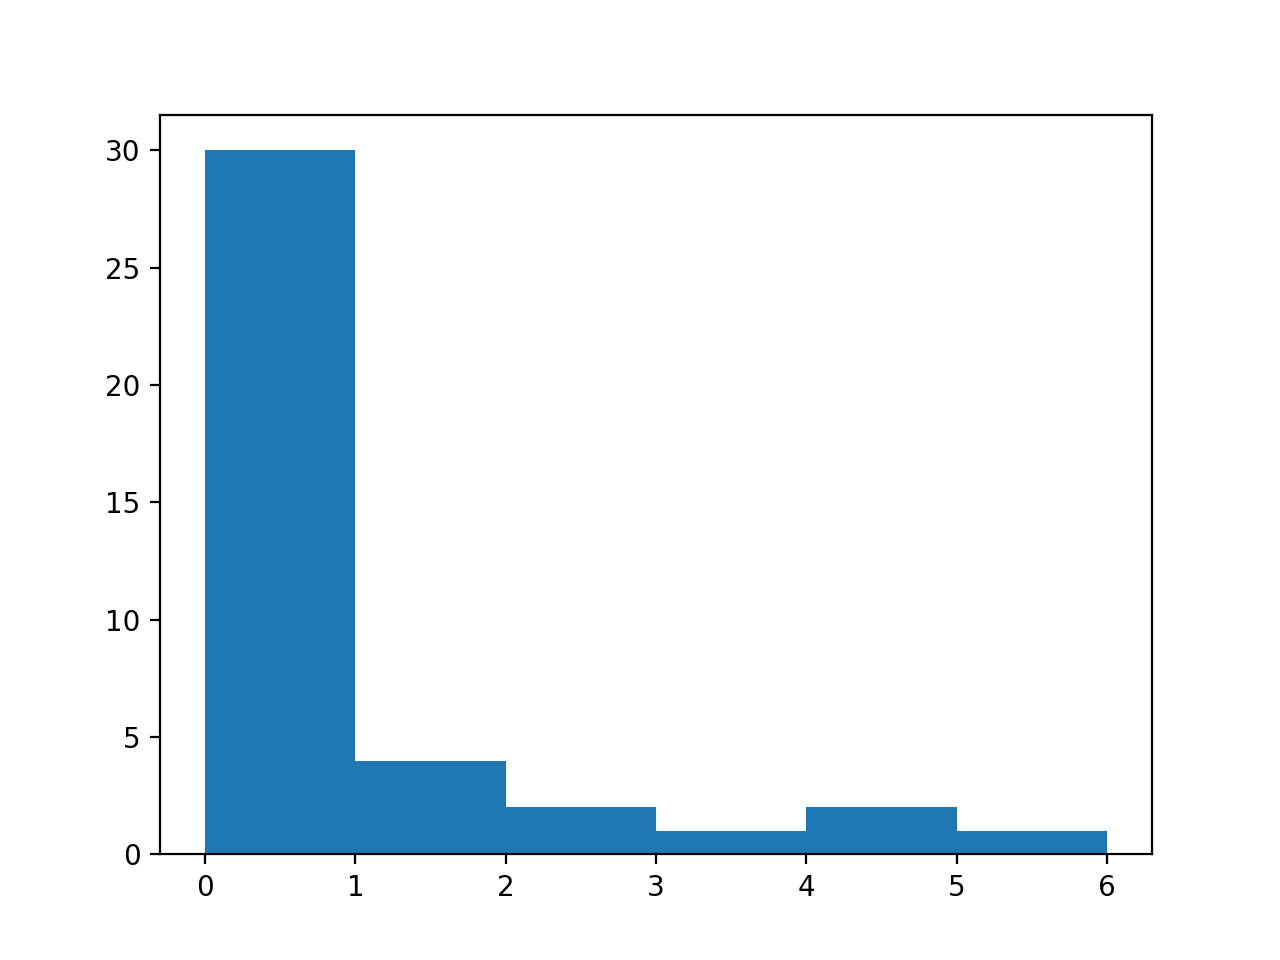

In [21]:
# Age deemed long-tailed
# age_log=[]
# for i in range(0,len(dataset_features[1])):
#     if dataset_features[1][i]<=0:
#         age_log.append(0)
#     else:
#         age_log.append(np.log2(dataset_features[1][i]))
# print(age_log)

# plt.hist(age_log,bins=range(0,math.ceil(np.log2(81))))
# plt.show()

In [42]:
# a=[0,8,0,16,8,0]
# nonzeros=list(np.nonzero(a)[0])
# print(nonzeros)
# log=[]
# for i in range(0,len(a)):
#     if a[i]==0:
#         log.append(0)
#     else:
#         log.append(np.log2(a[i]))
# print(log)

[1, 3, 4]
[0, 3.0, 0, 4.0, 3.0, 0]


## Train/Test Separation

In [6]:
perm = np.random.permutation(dataset_targets.shape[0])
dataset_features = dataset_features[perm]
dataset_targets = dataset_targets[perm]

def get_batch(n_size, phase):
    # select indices
    n_samples = dataset_features.shape[0]
    n_classes = int(dataset_targets.max() + 1)
    if phase == 'test':
        inds_sel = np.arange(0, int(n_samples*0.15), 1)
    elif phase == 'validation':
        n_samples = dataset_features.shape[0]
        inds_sel = np.arange(int(n_samples*0.15), int(n_samples*0.30), 1)
    elif phase == 'train':
        n_samples = dataset_features.shape[0]
        inds_sel = np.arange(int(n_samples*0.30), n_samples, 1)
    else:
        raise NotImplementedError
    inds_sel = np.random.permutation(inds_sel)
    batch_inds = []
    for cl in range(n_classes):
        inds_cl = inds_sel[dataset_targets[inds_sel] == cl]
        batch_inds.extend(inds_cl[:n_size//n_classes])
    batch_inds = np.random.permutation(batch_inds)
    
    return dataset_features[batch_inds], dataset_targets[batch_inds]
    
features_trn, targets_trn = get_batch(n_size=5000, phase='train')
features_tst, targets_tst = get_batch(n_size=1000, phase='test')

## Classification

In [7]:
# tmp = features_trn.T[10]
# np.where(np.isnan(tmp))
# np.where(np.isnan(tmp))


In [8]:
# features_trn = features_trn.T[:1].T
# features_tst = features_tst.T[:1].T

## Feature Selection

In [9]:
# L1-based
log_clf_l1 = LogisticRegression(max_iter=200, penalty='l1', solver='liblinear')
log_clf_l1.fit(features_trn, targets_trn)
model = SelectFromModel(log_clf_l1, prefit=True)
features_trn_l1 = model.transform(features_trn)
features_tst_l1 = model.transform(features_tst)

In [10]:
# Tree-based
from sklearn.model_selection import GridSearchCV
np.random.seed(100)
clf = RandomForestClassifier(n_jobs = -1)

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_estimators' : [50,100,200], 'max_leaf_nodes':[10,50,100]},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn, targets_trn)

grid_search.best_params_

{'max_leaf_nodes': 50, 'n_estimators': 200}

In [11]:
rnd_clf = RandomForestClassifier(n_estimators = 200, max_leaf_nodes = 50,n_jobs=-1)
rnd_clf.fit(features_trn, targets_trn)
model = SelectFromModel(rnd_clf, prefit=True)
features_trn_tree = model.transform(features_trn)
features_tst_tree = model.transform(features_tst)

In [12]:
model=SelectFromModel(rnd_clf, prefit=True, threshold=1.39763273e-02)
features_trn_tree2=model.transform(features_trn)
features_tst_tree2=model.transform(features_tst)

In [13]:
print(features_tst.shape)
print(features_tst_l1.shape)
print(features_tst_tree.shape)
print(features_tst_tree2.shape)
#features_trn

(1000, 80)
(1000, 71)
(1000, 18)
(1000, 16)


## Models w/ all features

In [14]:
rnd_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rnd_clf.fit(features_trn, targets_trn)
preds_tst = rnd_clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
#print(rnd_clf.feature_importances_)
print('accu_tst_RFC', accu)

svm_clf = SVC(gamma='auto')
svm_clf.fit(features_trn, targets_trn)
preds_tst = svm_clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC', accu)

log_clf_l1.fit(features_trn, targets_trn)
preds_tst = log_clf_l1.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
#print(log_clf_l1.coef_)
print('accu_tst_LR_l1', accu)

log_clf_elastic = LogisticRegression(max_iter=500, penalty='elasticnet',solver='saga')
log_clf_elastic.fit(features_trn, targets_trn)
preds_tst = log_clf_elastic.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_elastic', accu)

log_clf_l2 = LogisticRegression(max_iter=200, penalty='l2',solver='sag')
log_clf_l2.fit(features_trn, targets_trn)
preds_tst = log_clf_l2.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_l2', accu)

neigh_clf = KNeighborsClassifier(n_neighbors=3)
neigh_clf.fit(features_trn, targets_trn) 
preds_tst = neigh_clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_knn', accu)

adaboost_clf = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
adaboost_clf.fit(features_trn, targets_trn)
preds_tst = adaboost_clf.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_adaboost', accu)

accu_tst_RFC 0.731
accu_tst_SVC 0.719
accu_tst_LR_l1 0.746


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accu_tst_LR_elastic 0.747
accu_tst_LR_l2 0.747
accu_tst_knn 0.662
accu_tst_adaboost 0.744


In [15]:
LR_l1_allfeat_df = pd.DataFrame(log_clf_l1.coef_)
LR_l1_allfeat_df=LR_l1_allfeat_df.T
LR_l1_allfeat_df['features']=ds.feat_names
LR_l1_allfeat_df.to_csv("/Users/teianoel/Desktop/CS_205/LR_l1_allfeat_df.csv")

In [15]:
# Models w/ hyperparameter tuning

log_clf_l1_hyper = LogisticRegressionCV(penalty='l1',solver='liblinear')
log_clf_l1_hyper.fit(features_trn, targets_trn)
preds_tst = log_clf_l1_hyper.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_l1_hyper', accu)

log_clf_elastic_hyper = LogisticRegressionCV(max_iter=500,penalty='elasticnet',solver='saga')
log_clf_elastic_hyper.fit(features_trn, targets_trn)
preds_tst = log_clf_elastic_hyper.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_elastic_hyper', accu)

log_clf_l2_hyper = LogisticRegressionCV(penalty='l2',solver='sag')
log_clf_l2_hyper.fit(features_trn, targets_trn)
preds_tst = log_clf_l2_hyper.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_l2_hyper', accu)

accu_tst_LR_l1_hyper 0.748


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accu_tst_LR_elastic_hyper 0.748
accu_tst_LR_l2_hyper 0.747


In [58]:
LR_l1_hyper_allfeat_df = pd.DataFrame(log_clf_l1_hyper.coef_)
LR_l1_hyper_allfeat_df=LR_l1_hyper_allfeat_df.T
LR_l1_hyper_allfeat_df['features']=ds.feat_names
LR_l1_hyper_allfeat_df.to_csv("/Users/teianoel/Desktop/CS_205/LR_l1_hyper_allfeat_df.csv")

In [61]:
LR_elastic_hyper_allfeat_df = pd.DataFrame(log_clf_elastic_hyper.coef_)
LR_elastic_hyper_allfeat_df=LR_elastic_hyper_allfeat_df.T
LR_elastic_hyper_allfeat_df['features']=ds.feat_names
LR_elastic_hyper_allfeat_df.to_csv("/Users/teianoel/Desktop/CS_205/LR_elastic_hyper_allfeat_df.csv")

In [16]:
np.random.seed(100)
clf = RandomForestClassifier(n_jobs = -1)

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_estimators' : [50,100,200], 'max_leaf_nodes':[10,50,100]},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn, targets_trn)

grid_search.best_params_

{'max_leaf_nodes': 50, 'n_estimators': 200}

In [17]:
# random feature later used for tree-based feature selection threshold
rand_feat=norm(loc=0,scale=1,size=5000)
rand_feat=rand_feat.reshape(-1,1)
#rand_feat=[rand_feat]
#rand_feat.shape
features_trn_rand=np.append(features_trn,rand_feat,axis=1)
features_trn_rand.shape

rand_feat2=norm(loc=0,scale=1,size=1000)
rand_feat2=rand_feat2.reshape(-1,1)
#rand_feat=[rand_feat]
#rand_feat.shape
features_tst_rand=np.append(features_tst,rand_feat2,axis=1)
features_tst_rand.shape

(1000, 81)

In [18]:
rnd_clf_rand_hyper = RandomForestClassifier(n_estimators = 200, max_leaf_nodes = 50,n_jobs=-1)
rnd_clf_rand_hyper.fit(features_trn_rand, targets_trn)

preds_tst = rnd_clf_rand_hyper.predict(features_tst_rand)
accu = np.mean(preds_tst==targets_tst)
print(rnd_clf_rand_hyper.feature_importances_)
print('accu_tst_RFC_rand_hyper', accu)
#-->1.39763273e-02 used for tree-based selection threshold above

[  7.86078984e-03   8.13477393e-03   2.31281982e-01   1.01504833e-03
   7.14685325e-04   7.35700912e-03   9.82091103e-04   1.82457680e-03
   8.88089355e-05   6.24510725e-02   5.38939326e-03   1.84007408e-02
   0.00000000e+00   7.70507936e-03   1.14794755e-03   2.33769765e-03
   1.02136309e-02   1.54172615e-02   1.08549669e-02   1.15380773e-02
   1.32387044e-02   1.68691887e-02   1.49911730e-02   9.71755615e-03
   4.64622163e-03   4.96436772e-04   3.95575208e-03   0.00000000e+00
   9.64695768e-02   9.16025881e-03   1.33720817e-02   3.90995212e-04
   2.20869912e-03   1.76437920e-03   9.76373985e-04   9.23846994e-04
   9.36287027e-04   5.60034131e-03   8.53955289e-02   4.63719878e-02
   3.13550899e-02   4.15647325e-05   1.17874970e-03   8.76268425e-03
   6.70105885e-03   7.34355714e-03   4.41424082e-04   5.96139170e-04
   8.39374153e-04   2.07162372e-03   4.51513465e-03   0.00000000e+00
   4.11535808e-03   4.09867041e-03   4.94482313e-03   7.27233135e-03
   5.14400212e-03   3.05895766e-02

In [19]:
rnd_clf_hyper = RandomForestClassifier(n_estimators = 200, max_leaf_nodes = 50,n_jobs=-1)
rnd_clf_hyper.fit(features_trn, targets_trn)

preds_tst = rnd_clf_hyper.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
#print(rnd_clf.feature_importances_)
print('accu_tst_RFC_hyper', accu)

accu_tst_RFC_hyper 0.72


In [20]:
np.random.seed(100)
clf = SVC()

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn, targets_trn)

grid_search.best_params_

{'gamma': 1, 'kernel': 'linear'}

In [21]:
svm_clf_hyper = SVC(gamma=1,kernel='linear')
svm_clf_hyper.fit(features_trn,targets_trn)

preds_tst = svm_clf_hyper.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC_hyper', accu)

accu_tst_SVC_hyper 0.733


In [20]:
SVC_hyper_allfeat_df = pd.DataFrame(svm_clf_hyper.coef_)
SVC_hyper_allfeat_df=SVC_hyper_allfeat_df.T
SVC_hyper_allfeat_df['features']=ds.feat_names
SVC_hyper_allfeat_df.to_csv("/Users/teianoel/Desktop/CS_205/SVC_hyper_allfeat_df.csv")

NameError: name 'svm_clf_hyper' is not defined

In [22]:
np.random.seed(100)
clf = KNeighborsClassifier(n_jobs = -1)

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_neighbors' : [3,5,11], 'metric':['euclidean','manhattan'], 'weights':['uniform','distance']},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn, targets_trn)

grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [23]:
neigh_clf_hyper = KNeighborsClassifier(n_neighbors=11,metric='manhattan',weights='distance')
neigh_clf_hyper.fit(features_trn,targets_trn)

preds_tst = neigh_clf_hyper.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_KNN_hyper', accu)

accu_tst_KNN_hyper 0.705


In [24]:
np.random.seed(100)
clf = AdaBoostClassifier(base_estimator=LogisticRegression())

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_estimators' : [50,100,1000]},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn, targets_trn)

grid_search.best_params_

{'n_estimators': 100}

In [24]:
adaboost_clf_hyper = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
adaboost_clf_hyper.fit(features_trn,targets_trn)

preds_tst = adaboost_clf_hyper.predict(features_tst)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_adaboost_hyper', accu)

accu_tst_adaboost_hyper 0.744


In [27]:
voting_clf=VotingClassifier(
    estimators=[('lr',log_clf_l1_hyper), ('rf',rnd_clf_hyper), ('svc', svm_clf_hyper), ('knn', neigh_clf_hyper)],
    voting='hard')
voting_clf.fit(features_trn, targets_trn)

VotingClassifier(estimators=[('lr', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
   ...tan',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [28]:
for clf in (log_clf_l1_hyper,rnd_clf_hyper,svm_clf_hyper,neigh_clf_hyper,voting_clf):
    clf.fit(features_trn,targets_trn)
    y_pred=clf.predict(features_tst)
    print(clf.__class__.__name__,accuracy_score(targets_tst,y_pred))

LogisticRegressionCV 0.748
RandomForestClassifier 0.722
SVC 0.733
KNeighborsClassifier 0.705
VotingClassifier 0.738


In [29]:
voting_clf=VotingClassifier(
    estimators=[('lr',log_clf_l1_hyper), ('rf',rnd_clf_hyper), ('knn', neigh_clf_hyper)],
    voting='soft')
voting_clf.fit(features_trn, targets_trn)

VotingClassifier(estimators=[('lr', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
   ...tan',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [30]:
for clf in (log_clf_l1_hyper,rnd_clf_hyper,neigh_clf_hyper,voting_clf):
    clf.fit(features_trn,targets_trn)
    y_pred=clf.predict(features_tst)
    print(clf.__class__.__name__,accuracy_score(targets_tst,y_pred))

LogisticRegressionCV 0.748
RandomForestClassifier 0.726
KNeighborsClassifier 0.705
VotingClassifier 0.723


In [31]:
voting_clf=VotingClassifier(
    estimators=[('lr',log_clf_l1_hyper), ('svc', svm_clf_hyper)],
    voting='hard')
voting_clf.fit(features_trn, targets_trn)

VotingClassifier(estimators=[('lr', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
   ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [32]:
for clf in (log_clf_l1,svm_clf_hyper,voting_clf):
    clf.fit(features_trn,targets_trn)
    y_pred=clf.predict(features_tst)
    print(clf.__class__.__name__,accuracy_score(targets_tst,y_pred))

LogisticRegression 0.746
SVC 0.733
VotingClassifier 0.748


In [33]:
age_log_clf = LogisticRegression( max_iter=200, penalty='l1')
age_log_clf.fit(features_trn.T[2].T.reshape(-1,1), targets_trn)
preds_tst = age_log_clf.predict(features_tst.T[2].T.reshape(-1,1))
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_AGE_ONLY', accu)

accu_tst_LR_AGE_ONLY 0.721


## Models w/ l1-transformed features

In [20]:
rnd_clf_l1select = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rnd_clf_l1select.fit(features_trn_l1, targets_trn)
preds_tst = rnd_clf_l1select.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
#print(rnd_clf.feature_importances_)
print('accu_tst_RFC_l1select', accu)

svm_clf_l1select = SVC(gamma='auto')
svm_clf_l1select.fit(features_trn_l1, targets_trn)
preds_tst = svm_clf_l1select.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC_l1select', accu)

log_clf_l1_l1select = LogisticRegression(max_iter=200, penalty='l1',solver='saga')
log_clf_l1_l1select.fit(features_trn_l1,targets_trn)
preds_tst = log_clf_l1_l1select.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print(log_clf_l1_l1select.coef_)
print('accu_tst_LR_l1_l1select', accu)

log_clf_elastic_l1select = LogisticRegression(max_iter=200, penalty='elasticnet',solver='saga')
log_clf_elastic_l1select.fit(features_trn_l1, targets_trn)
preds_tst = log_clf_elastic_l1select.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_elastic_l1select', accu)

log_clf_l2_l1select = LogisticRegression(max_iter=200, penalty='l2',solver='sag')
log_clf_l2_l1select.fit(features_trn_l1, targets_trn)
preds_tst = log_clf_l2_l1select.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_l2_l1select', accu)

neigh_clf_l1select = KNeighborsClassifier(n_neighbors=3)
neigh_clf_l1select.fit(features_trn_l1, targets_trn) 
preds_tst = neigh_clf_l1select.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_knn_l1select', accu)

adaboost_clf_l1select = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
adaboost_clf_l1select.fit(features_trn_l1, targets_trn)
preds_tst = adaboost_clf_l1select.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_adaboost_l1select', accu)

accu_tst_RFC_l1select 0.727
accu_tst_SVC_l1select 0.716


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[ -6.59512116e-01   1.50364426e+00  -2.91196562e-02  -2.76271942e-01
    2.31795314e-01  -4.17773910e-01  -9.59587224e-01  -5.85337142e-02
   -3.77812319e-02   3.51879172e-02  -6.16887475e-01  -4.21535961e-01
   -1.48583815e-01   8.20491682e-02   1.62933888e-03   4.81004657e-01
    6.24577227e-01  -2.23711481e-02  -9.43473450e-02   3.67576441e-02
    4.41830337e-01  -3.52176835e-01   4.51912751e-02  -1.73125309e-02
   -1.14427889e-02  -3.65171769e-02  -2.90488344e-02   1.87814294e-02
   -3.66175249e-02   8.89910202e-02  -5.11706089e-02   1.08979035e-02
   -1.61422394e-02   1.05742609e-01  -3.93289168e-01  -2.70397863e-01
   -2.53263224e-01  -4.19799693e-01   1.99299418e-01  -2.24957890e-01
    8.87381006e-02  -5.60237074e-02   2.87359410e-01  -1.94777030e-01
    1.91360643e-01   5.07811092e-02  -9.31034699e-03  -2.82001079e-02
   -2.27016235e-02   2.08480065e-01   4.16069085e-01   8.06842190e-01
   -3.26116158e-01   6.48780401e-02  -4.58745735e-02   8.77147187e-02
   -5.51119392e-01  

In [21]:
# Models w/ hyperparameter tuning

log_clf_l1_l1select_hyper = LogisticRegressionCV(penalty='l1',solver='liblinear')
log_clf_l1_l1select_hyper.fit(features_trn_l1, targets_trn)
preds_tst = log_clf_l1_l1select_hyper.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
#print(log_clf_l1.coef_)
print('accu_tst_LR_l1_l1select_hyper', accu)

log_clf_elastic_l1select_hyper = LogisticRegressionCV(penalty='elasticnet',solver='saga')
log_clf_elastic_l1select_hyper.fit(features_trn_l1, targets_trn)
preds_tst = log_clf_elastic_l1select_hyper.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_elastic_l1select_hyper', accu)

log_clf_l2_l1select_hyper = LogisticRegressionCV(penalty='l2',solver='sag')
log_clf_l2_l1select_hyper.fit(features_trn_l1, targets_trn)
preds_tst = log_clf_l2_l1select_hyper.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_l2_l1select_hyper', accu)

accu_tst_LR_l1_l1select_hyper 0.742


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accu_tst_LR_elastic_l1select_hyper 0.746
accu_tst_LR_l2_l1select_hyper 0.746


In [96]:
l1_nonzero_coefs=np.where(log_clf_l1.coef_[0]!=0)
l1_nonzero_coefs=l1_nonzero_coefs[0].tolist()

ds.feat_names_list=ds.feat_names.tolist()
ds.feat_names_l1select=[ds.feat_names_list[i] for i in l1_nonzero_coefs]

LR_elastic_l1select_hyper_df = pd.DataFrame(log_clf_elastic_l1select_hyper.coef_)
LR_elastic_l1select_hyper_df=LR_elastic_l1select_hyper_df.T
LR_elastic_l1select_hyper_df['features']=ds.feat_names_l1select
LR_elastic_l1select_hyper_df.to_csv("/Users/teianoel/Desktop/CS_205/LR_elastic_hyper_l1select_df.csv")

In [97]:
LR_l2_l1select_hyper_df = pd.DataFrame(log_clf_l2_l1select_hyper.coef_)
LR_l2_l1select_hyper_df=LR_l2_l1select_hyper_df.T
LR_l2_l1select_hyper_df['features']=ds.feat_names_l1select
LR_l2_l1select_hyper_df.to_csv("/Users/teianoel/Desktop/CS_205/LR_l2_hyper_l1select_df.csv")

In [36]:
clf = RandomForestClassifier(n_jobs = -1)

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_estimators' : [50,100,200], 'max_leaf_nodes':[10,50,100]},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn_l1, targets_trn)

grid_search.best_params_

{'max_leaf_nodes': 100, 'n_estimators': 200}

In [37]:
rnd_clf_l1select_hyper = RandomForestClassifier(n_estimators = 200, max_leaf_nodes = 100,n_jobs=-1)
rnd_clf_l1select_hyper.fit(features_trn_l1, targets_trn)

preds_tst = rnd_clf_l1select_hyper.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
#print(rnd_clf.feature_importances_)
print('accu_tst_RFC_l1select_hyper', accu)

accu_tst_RFC_l1select_hyper 0.727


In [38]:
np.random.seed(100)
clf = KNeighborsClassifier(n_jobs = -1)

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_neighbors' : [3,5,11], 'metric':['euclidean','manhattan'], 'weights':['uniform','distance']},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn_l1, targets_trn)

grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [39]:
neigh_clf_l1select_hyper = KNeighborsClassifier(n_neighbors=11,metric='manhattan',weights='uniform')
neigh_clf_l1select_hyper.fit(features_trn_l1,targets_trn)

preds_tst = neigh_clf_l1select_hyper.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_KNN_l1select_hyper', accu)

accu_tst_KNN_l1select_hyper 0.709


In [40]:
np.random.seed(100)
clf = AdaBoostClassifier(base_estimator=LogisticRegression())

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_estimators' : [50,100,1000]},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn_l1, targets_trn)

grid_search.best_params_

{'n_estimators': 100}

In [41]:
adaboost_clf_l1select_hyper = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
adaboost_clf_l1select_hyper.fit(features_trn_l1,targets_trn)

preds_tst = adaboost_clf_l1select_hyper.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_adaboost_l1select_hyper', accu)

accu_tst_adaboost_l1select_hyper 0.74


In [42]:
np.random.seed(100)
clf = SVC()

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn_l1, targets_trn)

grid_search.best_params_

{'gamma': 1, 'kernel': 'linear'}

In [43]:
svm_clf_l1select_hyper = SVC(gamma=1,kernel='linear')
svm_clf_l1select_hyper.fit(features_trn_l1,targets_trn)

preds_tst = svm_clf_l1select_hyper.predict(features_tst_l1)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC_l1select_hyper', accu)

accu_tst_SVC_l1select_hyper 0.734


In [98]:
SVC_l1select_hyper_df = pd.DataFrame(log_clf_l2_l1select_hyper.coef_)
SVC_l1select_hyper_df=SVC_l1select_hyper_df.T
SVC_l1select_hyper_df['features']=ds.feat_names_l1select
SVC_l1select_hyper_df.to_csv("/Users/teianoel/Desktop/CS_205/SVC_hyper_l1select_df.csv")

In [44]:
voting_clf=VotingClassifier(
    estimators=[('lr',log_clf_l2_l1select_hyper), ('rf',rnd_clf_l1select), ('svc', svm_clf_l1select_hyper), ('knn', neigh_clf_l1select_hyper)],
    voting='hard')
voting_clf.fit(features_trn_l1, targets_trn)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


VotingClassifier(estimators=[('lr', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='sag', tol=0.0001, verbose=0...ttan',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [45]:
for clf in (log_clf_l2_l1select_hyper,rnd_clf_l1select,svm_clf_l1select_hyper,neigh_clf_l1select_hyper,voting_clf):
    clf.fit(features_trn_l1,targets_trn)
    y_pred=clf.predict(features_tst_l1)
    print(clf.__class__.__name__,accuracy_score(targets_tst,y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegressionCV 0.75
RandomForestClassifier 0.728
SVC 0.734
KNeighborsClassifier 0.709


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


VotingClassifier 0.74


## Models with tree-transformed features 

In [22]:
rnd_clf_treeselect = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rnd_clf_treeselect.fit(features_trn_tree2, targets_trn)
preds_tst = rnd_clf_treeselect.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
#print(rnd_clf.feature_importances_)
print('accu_tst_RFC_treeselect', accu)

svm_clf_treeselect = SVC(gamma='auto')
svm_clf_treeselect.fit(features_trn_tree2, targets_trn)
preds_tst = svm_clf_treeselect.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_SVC_treeselect', accu)

log_clf_l1_treeselect = LogisticRegression(max_iter=200, penalty='l1',solver='liblinear')
log_clf_l1_treeselect.fit(features_trn_tree2,targets_trn)
preds_tst = log_clf_l1_treeselect.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_treeselect', accu)

log_clf_elastic_treeselect = LogisticRegression(max_iter=200, penalty='elasticnet',solver='saga')
log_clf_elastic_treeselect.fit(features_trn_tree2, targets_trn)
preds_tst = log_clf_elastic_treeselect.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_elastic_l1select', accu)

log_clf_l2_treeselect = LogisticRegression(max_iter=200, penalty='l2',solver='sag')
log_clf_l2_treeselect.fit(features_trn_tree2, targets_trn)
preds_tst = log_clf_l2_treeselect.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_l2_l1select', accu)

neigh_clf_treeselect = KNeighborsClassifier(n_neighbors=3)
neigh_clf_treeselect.fit(features_trn_tree2, targets_trn) 
preds_tst = neigh_clf_treeselect.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_knn_treeselect', accu)

adaboost_clf_treeselect = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
adaboost_clf_treeselect.fit(features_trn_tree2, targets_trn)
preds_tst = adaboost_clf_treeselect.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_adaboost_treeselect', accu)

accu_tst_RFC_treeselect 0.719
accu_tst_SVC_treeselect 0.722
accu_tst_LR_treeselect 0.739


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accu_tst_LR_elastic_l1select 0.739
accu_tst_LR_l2_l1select 0.739
accu_tst_knn_treeselect 0.649
accu_tst_adaboost_treeselect 0.737


In [23]:
# Models w/ hyperparameter tuning
log_clf_l1_treeselect_hyper = LogisticRegressionCV(penalty='l1',solver='liblinear')
log_clf_l1_treeselect_hyper.fit(features_trn_tree2, targets_trn)
preds_tst = log_clf_l1_treeselect_hyper.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
#print(log_clf_l1.coef_)
print('accu_tst_LR_l1_treeselect_hyper', accu)

log_clf_elastic_treeselect_hyper = LogisticRegressionCV(penalty='elasticnet',solver='saga')
log_clf_elastic_treeselect_hyper.fit(features_trn_tree2, targets_trn)
preds_tst = log_clf_elastic_treeselect_hyper.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_elastic_treeselect_hyper', accu)

log_clf_l2_treeselect_hyper = LogisticRegressionCV(penalty='l2',solver='sag')
log_clf_l2_treeselect_hyper.fit(features_trn_tree2, targets_trn)
preds_tst = log_clf_l2_treeselect_hyper.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_LR_l2_treeselect_hyper', accu)

accu_tst_LR_l1_treeselect_hyper 0.736


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accu_tst_LR_elastic_treeselect_hyper 0.738
accu_tst_LR_l2_treeselect_hyper 0.739


In [74]:
tree_nonzero_importances=np.where(rnd_clf.feature_importances_>1.39763273e-02)
tree_nonzero_importances=tree_nonzero_importances[0].tolist()

ds.feat_names_list=ds.feat_names.tolist()
ds.feat_names_treeselect=[ds.feat_names_list[i] for i in tree_nonzero_importances]
len(ds.feat_names_treeselect)

LR_l1_treeselect_hyper_df = pd.DataFrame(log_clf_l1_treeselect_hyper.coef_)
LR_l1_treeselect_hyper_df=LR_l1_treeselect_hyper_df.T
LR_l1_treeselect_hyper_df['features']=ds.feat_names_treeselect
LR_l1_treeselect_hyper_df.to_csv("/Users/teianoel/Desktop/CS_205/LR_l1_hyper_treeselect_df.csv")

In [75]:
clf = RandomForestClassifier(n_jobs = -1)

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_estimators' : [50,100,200], 'max_leaf_nodes':[10,50,100]},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn_tree2, targets_trn)

grid_search.best_params_

{'max_leaf_nodes': 100, 'n_estimators': 50}

In [76]:
rnd_clf_treeselect_hyper = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = 100,n_jobs=-1)
rnd_clf_treeselect_hyper.fit(features_trn_tree2, targets_trn)

preds_tst = rnd_clf_treeselect_hyper.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
#print(rnd_clf.feature_importances_)
print('accu_tst_RFC_treeselect_hyper', accu)

accu_tst_RFC_treeselect_hyper 0.719


In [77]:
np.random.seed(100)
clf = KNeighborsClassifier(n_jobs = -1)

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_neighbors' : [3,5,11], 'metric':['euclidean','manhattan'], 'weights':['uniform','distance']},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn_tree2, targets_trn)

grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [78]:
neigh_clf_treeselect_hyper = KNeighborsClassifier(n_neighbors=11,metric='manhattan',weights='uniform')
neigh_clf_treeselect_hyper.fit(features_trn_tree2,targets_trn)

preds_tst = neigh_clf_treeselect_hyper.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_KNN_treeselect_hyper', accu)

accu_tst_KNN_treeselect_hyper 0.69


In [79]:
np.random.seed(100)
clf = SVC()

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn_tree2, targets_trn)

grid_search.best_params_

{'gamma': 1, 'kernel': 'linear'}

In [80]:
svm_clf_treeselect_hyper = SVC(gamma=1,kernel='linear')
svm_clf_treeselect_hyper.fit(features_trn_tree2,targets_trn)

preds_tst = svm_clf_treeselect_hyper.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_svm_treeselect_hyper', accu)

accu_tst_svm_treeselect_hyper 0.722


In [81]:
# SVC_treeselect_hyper_df = pd.DataFrame(svm_clf_treeselect_hyper.coef_)
# SVC_treeselect_hyper_df=SVC_treeselect_hyper_df.T
# SVC_treeselect_hyper_df['features']=ds.feat_names_treeselect
# SVC_treeselect_hyper_df.to_csv("/Users/teianoel/Desktop/CS_205/SVC_hyper_treeselect_df.csv")

In [82]:
np.random.seed(100)
clf = AdaBoostClassifier(base_estimator=LogisticRegression())

#Setup parameter values to search through
#uses cross validation to select best params
param_grid = [
    {'n_estimators' : [50,100,1000]},
    ]
grid_search = GridSearchCV(clf, param_grid,cv=5)
grid_search.fit(features_trn_tree2, targets_trn)

grid_search.best_params_

{'n_estimators': 1000}

In [83]:
adaboost_clf_treeselect_hyper = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=1000)
adaboost_clf_treeselect_hyper.fit(features_trn_tree2,targets_trn)

preds_tst = adaboost_clf_treeselect_hyper.predict(features_tst_tree2)
accu = np.mean(preds_tst==targets_tst)
print('accu_tst_adaboost_treeselect_hyper', accu)

accu_tst_adaboost_treeselect_hyper 0.739


In [85]:
voting_clf=VotingClassifier(
    estimators=[('ad',adaboost_clf_treeselect_hyper), ('rf',rnd_clf_treeselect_hyper), ('svc', svm_clf_treeselect_hyper), ('knn', neigh_clf_treeselect_hyper)],
    voting='hard')
voting_clf.fit(features_trn_tree2, targets_trn)

VotingClassifier(estimators=[('ad', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', to...ttan',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [86]:
for clf in (adaboost_clf_treeselect_hyper,rnd_clf_treeselect_hyper,svm_clf_treeselect_hyper,neigh_clf_treeselect_hyper,voting_clf):
    clf.fit(features_trn_tree2,targets_trn)
    y_pred=clf.predict(features_tst_tree2)
    print(clf.__class__.__name__,accuracy_score(targets_tst,y_pred))

AdaBoostClassifier 0.739
RandomForestClassifier 0.723
SVC 0.722
KNeighborsClassifier 0.69
VotingClassifier 0.735
